In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [2]:
os.chdir("threat_images")

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 9452-2BAA

 Directory of C:\Users\Hp\Desktop\BaggageAI_CV_Hiring_Assignment\threat_images

31-12-2021  17:15    <DIR>          .
31-12-2021  17:15    <DIR>          ..
31-12-2021  15:39    <DIR>          .ipynb_checkpoints
30-09-2020  17:07             3,414 BAGGAGE_20170522_113049_80428_A.jpg
30-09-2020  17:07             4,130 BAGGAGE_20170522_115645_80428_B.jpg
30-09-2020  17:07             3,771 BAGGAGE_20170523_085803_80428_D.jpg
30-09-2020  17:07             9,648 BAGGAGE_20170523_094231_80428_B.jpg
30-09-2020  17:08             6,449 BAGGAGE_20170524_075554_80428_B.jpg
30-12-2021  17:16            89,908 BAGGAGE_20180811_175323_83216_B_1.jpg
30-12-2021  18:20             6,905 contours_none_image1.jpg
31-12-2021  17:15               359 image_masked.png
30-12-2021  18:20             4,335 image_thres1.jpg
31-12-2021  16:04             2,374 img_0.jpg
31-12-2021  16:04               671 img_1.jpg
31-12-2021  16:04         

In [4]:
img = cv.imread("BAGGAGE_20170522_113049_80428_A.jpg")

In [5]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [6]:
cv.imshow("Image", img)
cv.waitKey(0)
cv.destroyAllWindows()

(768, 232, 3)

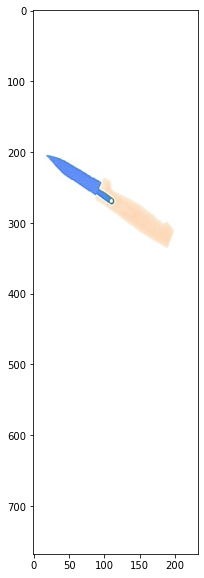

In [8]:
plt.figure(figsize = (10, 10))
plt.imshow(img)
img.shape

In [9]:
img_2 = img[200:350, 20:200]#y2-y1 = 150, x2-x1=180

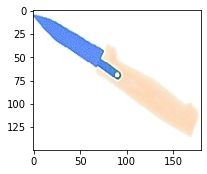

In [11]:
plt.figure(figsize =(3,3))
plt.imshow(img_2)

In [88]:
img_2 = cv.GaussianBlur(img_2, ksize = (9,9), sigmaX = 0)

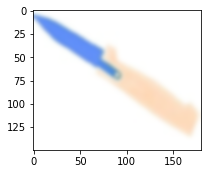

In [89]:
plt.figure(figsize =(3,3))
plt.imshow(img_2)

In [90]:
img_2.shape

(150, 180, 3)

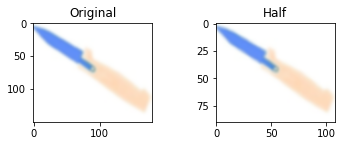

In [91]:
half = cv.resize(img_2, (0, 0), fx = 0.6, fy = 0.6)
 
Titles =["Original", "Half"]
images =[img_2, half]
count = 2
 
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
 
plt.show()

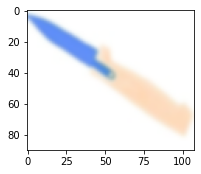

In [92]:
plt.figure(figsize =(3,3))
plt.imshow(half)

In [93]:
half.shape

(90, 108, 3)

In [94]:
cv.imwrite("scaled_image.jpg", half)

True

In [175]:
scaled_image = cv.imread("scaled_image.jpg")

scaled_image.shape

(90, 108, 3)

In [176]:
cv.imshow("Image", scaled_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [177]:
img_5 = cv.imread("BAGGAGE_20180811_175323_83216_B_1.jpg")

In [178]:
cv.imshow("Image", img_5)
cv.waitKey(0)
cv.destroyAllWindows()

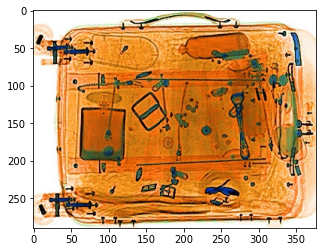

In [179]:
img_5 = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
plt.imshow(img_5)

In [180]:
roi = img_5[200:290, 130:238]

roi.shape

(90, 108, 3)

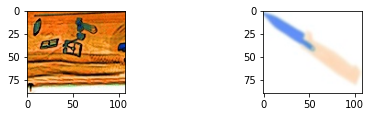

In [181]:
plt.figure(figsize = (6,6))
plt.subplot(1,3,1);plt.imshow(roi)
plt.subplot(1,3,3);plt.imshow(scaled_image)

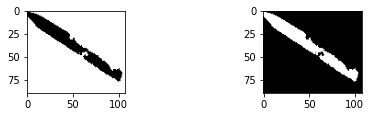

In [182]:
img_gray = cv.cvtColor(scaled_image, cv.COLOR_RGB2GRAY)

_, mask = cv.threshold(img_gray, 254/2+100, 255, cv.THRESH_BINARY)

mask_inv = cv.bitwise_not(mask)

plt.figure(figsize = (6,6))

plt.subplot(1,3,1);plt.imshow(mask, cmap = 'gray')
plt.subplot(1,3,3);plt.imshow(mask_inv, cmap = 'gray')

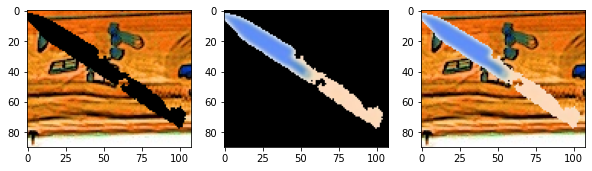

In [183]:
img_bg = cv.bitwise_and(roi, roi, mask = mask)
img_fg = cv.bitwise_and(scaled_image, scaled_image, mask = mask_inv)
dst = cv.add(img_fg, img_bg)

plt.figure(figsize = (10,6))
plt.subplot(1,3,1);plt.imshow(img_bg)
plt.subplot(1,3,2);plt.imshow(img_fg)
plt.subplot(1,3,3);plt.imshow(dst)

In [185]:
img_5[200:290, 130:238] = dst
img_5 = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
cv.imshow("Image",img_5)
cv.waitKey(0)
cv.destroyAllWindows()

In [186]:
height, width = half.shape[:2]

In [22]:
center = (width/2, height/2)

In [23]:
def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
    # perform the actual rotation and return the image
    return cv.warpAffine(image, M, (nW, nH))

In [24]:
image = rotate_bound(half, 45)

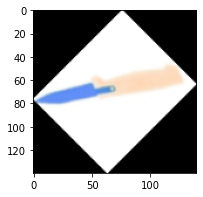

In [25]:
plt.figure(figsize= (3,3))
plt.imshow(image)

In [26]:
print(image.shape)

(140, 140, 3)


In [24]:
#convert it to gray scale

cv.imwrite("rotated_image.jpg", image)

True

In [25]:
rotated_image = cv.imread("rotated_image.jpg")

In [27]:
cv.imshow("Image", rotated_image)
cv.waitKey(0)
cv.destroyAllWindows()

In [29]:
image_gray = cv.cvtColor(rotated_image, cv.COLOR_RGB2GRAY)

In [30]:
cv.imshow("Image", image_gray)
cv.waitKey(0)
cv.destroyAllWindows()

In [31]:
print(image_gray.shape)

(140, 140)


In [56]:
a = image_gray.max()
thresh, image_edges = cv.threshold(image_gray,a/2+60 ,a, cv.THRESH_BINARY)

In [57]:
cv.imshow("Image",image_edges)
cv.waitKey(0)
cv.destroyAllWindows()

In [58]:
canvas = np.zeros(rotated_image.shape, np.uint8)
canvas.fill(255)

In [59]:
mask = np.zeros(rotated_image.shape, np.uint8)
mask.fill(255)

In [63]:
contours_draw, hierarchy = cv.findContours(
                                   image = image_edges, 
                                   mode = cv.RETR_LIST, 
                                   method = cv.CHAIN_APPROX_SIMPLE)

In [64]:
contours_mask, hierarchy = cv.findContours(
                                   image = image_edges, 
                                   mode = cv.RETR_EXTERNAL, 
                                   method = cv.CHAIN_APPROX_SIMPLE)

In [65]:
cv.drawContours(canvas, contours_draw, -1, (0,255,0), 1)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [66]:
cv.imshow("Image", canvas)

In [44]:
image = cv.imread('rotated_image.jpg', -1)
# mask defaulting to black for 3-channel and transparent for 4-channel
# (of course replace corners with yours)
mask = np.zeros(image.shape, dtype=np.uint8)
roi_corners = np.array([[(10,10), (30,30), (10,30)]], dtype=np.int32)
# fill the ROI so it doesn't get wiped out when the mask is applied
channel_count = image.shape[2]  # i.e. 3 or 4 depending on your image
ignore_mask_color = (255,)*channel_count
cv.fillPoly(mask, roi_corners, ignore_mask_color)
# from Masterfool: use cv2.fillConvexPoly if you know it's convex

# apply the mask
masked_image = cv.bitwise_and(image, mask)

# save the result
cv.imwrite('image_masked.png', masked_image)

True

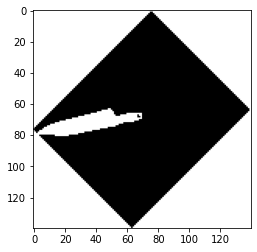

In [66]:
img_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
# Apply the thresholding
a = img_gray.max()  
_, thresh = cv.threshold(img_gray, a/2+60, a,cv.THRESH_BINARY_INV)
plt.imshow(thresh, cmap = 'gray')

In [28]:
contours, hierarchy = cv.findContours(
                                   image = thresh, 
                                   mode = cv.RETR_TREE, 
                                   method = cv.CHAIN_APPROX_SIMPLE)
i = 0
for c in contours:
    # get the bounding rect
    x, y, w, h = cv.boundingRect(c)
    # to save the images
    cv.imwrite('img_{}.jpg'.format(i), image[y:y+h,x:x+w])
    i += 1

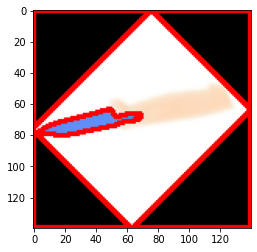

In [29]:
contours = sorted(contours, key = cv.contourArea, reverse = True)
# Draw the contour 
img_3copy = image.copy()
final = cv.drawContours(img_3copy, contours, contourIdx = -1, 
                         color = (255, 0, 0), thickness = 2)
plt.imshow(img_3copy)

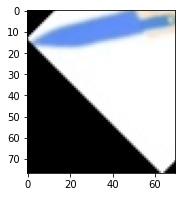

In [ ]:
img = cv2.imread('...', 0) # Read in your image
# contours, _ = cv2.findContours(...) # Your call to find the contours using OpenCV 2.4.x
_, contours, _ = cv2.findContours(...) # Your call to find the contours
idx = ... # The index of the contour that surrounds your object
mask = np.zeros_like(img) # Create mask where white is what we want, black otherwise
cv2.drawContours(mask, contours, idx, 255, -1) # Draw filled contour in mask
out = np.zeros_like(img) # Extract out the object and place into output image
out[mask == 255] = img[mask == 255]

# Now crop
(y, x) = np.where(mask == 255)
(topy, topx) = (np.min(y), np.min(x))
(bottomy, bottomx) = (np.max(y), np.max(x))
out = out[topy:bottomy+1, topx:bottomx+1]

# Show the output image
cv2.imshow('Output', out)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
def getTranslationMatrix2d(dx, dy):
    """
    Returns a numpy affine transformation matrix for a 2D translation of
    (dx, dy)
    """
    return np.matrix([[1, 0, dx], [0, 1, dy], [0, 0, 1]])


def rotateImage(image, angle):
    """
    Rotates the given image about it's centre
    """

    image_size = (image.shape[1], image.shape[0])
    image_center = tuple(np.array(image_size) / 2)

    rot_mat = np.vstack([cv.getRotationMatrix2D(image_center, angle, 1.0), [0, 0, 1]])
    trans_mat = np.identity(3)

    w2 = image_size[0] * 0.5
    h2 = image_size[1] * 0.5

    rot_mat_notranslate = np.matrix(rot_mat[0:2, 0:2])

    tl = (np.array([-w2, h2]) * rot_mat_notranslate).A[0]
    tr = (np.array([w2, h2]) * rot_mat_notranslate).A[0]
    bl = (np.array([-w2, -h2]) * rot_mat_notranslate).A[0]
    br = (np.array([w2, -h2]) * rot_mat_notranslate).A[0]

    x_coords = [pt[0] for pt in [tl, tr, bl, br]]
    x_pos = [x for x in x_coords if x > 0]
    x_neg = [x for x in x_coords if x < 0]

    y_coords = [pt[1] for pt in [tl, tr, bl, br]]
    y_pos = [y for y in y_coords if y > 0]
    y_neg = [y for y in y_coords if y < 0]

    right_bound = max(x_pos)
    left_bound = min(x_neg)
    top_bound = max(y_pos)
    bot_bound = min(y_neg)

    new_w = int(abs(right_bound - left_bound))
    new_h = int(abs(top_bound - bot_bound))
    new_image_size = (new_w, new_h)

    new_midx = new_w * 0.5
    new_midy = new_h * 0.5

    dx = int(new_midx - w2)
    dy = int(new_midy - h2)

    trans_mat = getTranslationMatrix2d(dx, dy)
    affine_mat = (np.matrix(trans_mat) * np.matrix(rot_mat))[0:2, :]
    result = cv.warpAffine(image, affine_mat, new_image_size, flags=cv.INTER_LINEAR)

    return result

In [36]:
img_4 = rotateImage(half, 45)

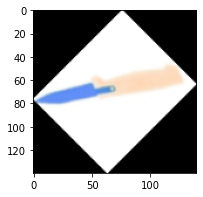

In [37]:
plt.figure(figsize= (3,3))
plt.imshow(img_4)

In [120]:
img_5 = cv.imread("BAGGAGE_20180811_175323_83216_B_1.jpg")

In [121]:
cv.imshow("Image", img_5)
cv.waitKey(0)
cv.destroyAllWindows()

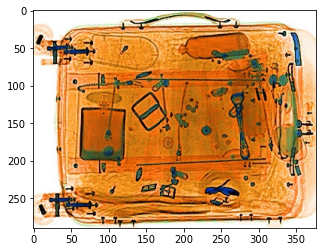

In [122]:
img_5 = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
plt.imshow(img_5)

In [128]:
roi = img_5[170:300, 192:330]

roi.shape

(120, 138, 3)

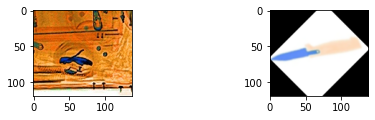

In [129]:
plt.figure(figsize = (6,6))
plt.subplot(1,3,1);plt.imshow(roi)
plt.subplot(1,3,3);plt.imshow(paddedrotated)

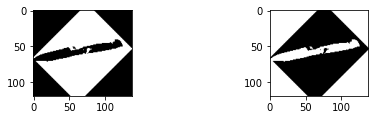

In [130]:
img_gray = cv.cvtColor(paddedrotated, cv.COLOR_RGB2GRAY)

_, mask = cv.threshold(img_gray, 254/2+100, 255, cv.THRESH_BINARY)

mask_inv = cv.bitwise_not(mask)

plt.figure(figsize = (6,6))

plt.subplot(1,3,1);plt.imshow(mask, cmap = 'gray')
plt.subplot(1,3,3);plt.imshow(mask_inv, cmap = 'gray')

In [131]:
print(mask.shape)
print(roi.shape)

(120, 138)
(120, 138, 3)


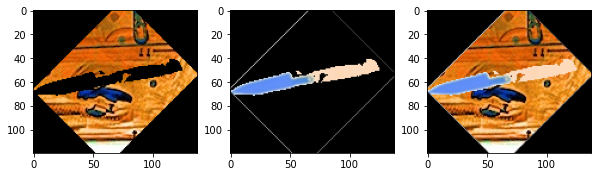

In [133]:
img_bg = cv.bitwise_and(roi, roi, mask = mask)
img_fg = cv.bitwise_and(paddedrotated, paddedrotated, mask = mask_inv)
dst = cv.add(img_fg, img_bg)

plt.figure(figsize = (10,6))
plt.subplot(1,3,1);plt.imshow(img_bg)
plt.subplot(1,3,2);plt.imshow(img_fg)
plt.subplot(1,3,3);plt.imshow(dst)

In [187]:
img_5[170:300, 192:330] = dst
img_5 = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)
cv.imshow("Image",img_5)
cv.waitKey(0)
cv.destroyAllWindows()

ValueError: could not broadcast input array from shape (90,108,3) into shape (120,138,3)

In [ ]:
yesno = Image.open('images\yesno.jpg').convert('RGBA')
asset = member.avatar_url_as(size = 128)
data = BytesIO(await asset.read())
pfp = Image.open(data).convert('RGBA')
pfp = pfp.resize((100,100))
pfp = pfp.rotate(-50,fillcolor = 0)
#
yesno.paste(pfp, (138,408),pfp)
#
yesno.save('proba.png')